<a href="https://colab.research.google.com/github/HariTarz/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Mounting the drive and reading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Regression Capstone Project/NYC Taxi Trip Time Prediction/dat/NYC Taxi Data.csv'
data = pd.read_csv(path)

### EXploration of dataset

In [4]:
#Viewing the data for the first time
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
data.shape

(1458644, 11)

In [7]:
# Checking for null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
# checking for categorical columns
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [10]:
data.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Data cleaning

In [11]:
# Making a copy of dataframe
df = data.copy()

In [12]:
# Converting the date and time columns drom type object to type datetime
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [13]:
# checking for longer trip (more than one day)
df[df.trip_duration > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


In [14]:
df['calculated_trip_duration'] = (df.dropoff_datetime - df.pickup_datetime).dt.total_seconds()

In [15]:
# df['pickup_year'] = df.pickup_datetime.dt.year
df['pickup_month'] = df.pickup_datetime.dt.month
df['pickup_weekday'] = df.pickup_datetime.dt.weekday
df['pickup_weekday_name'] = df.pickup_datetime.dt.day_name()
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [16]:
pip install haversine

In [17]:
from haversine import haversine

In [18]:
def calc_distance_km(d):
  '''This function takes longitude and latitude from a dataset and can return haversine distance in km'''
  pickup_point = (d.pickup_longitude,d.pickup_latitude)
  dropoff_point = (d.dropoff_longitude,d.dropoff_latitude)
  return haversine(pickup_point,dropoff_point)

In [19]:
# Creating a seperate cloumn for distace between the pickup and dropoff points
df['distance'] = df.apply(lambda x: calc_distance_km(x), axis = 1)

In [20]:
# Creating a column for approximate speed of the Taxi in km/h
df['speed'] = df['distance']/(df.trip_duration/3600)

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder  = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [22]:
cate_col = ['store_and_fwd_flag']

In [23]:
encoder.fit(df[cate_col])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [24]:
enc_col = encoder.get_feature_names(cate_col).tolist()
enc_col

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['store_and_fwd_flag_N', 'store_and_fwd_flag_Y']

In [25]:
# Encoing the flag cloumn using one hot encoding
df[enc_col] = encoder.transform(df[cate_col])

In [26]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,calculated_trip_duration,pickup_month,pickup_weekday,pickup_weekday_name,pickup_hour,distance,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,455.0,3,0,Monday,17,1.949980,15.428414,1.0,0.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,663.0,6,6,Sunday,0,2.132181,11.577453,1.0,0.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2124.0,1,1,Tuesday,11,3.359043,5.693294,1.0,0.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,429.0,4,2,Wednesday,19,0.475520,3.990375,1.0,0.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,435.0,3,5,Saturday,13,0.328461,2.718301,1.0,0.0


### Univaiate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of trip_duration')

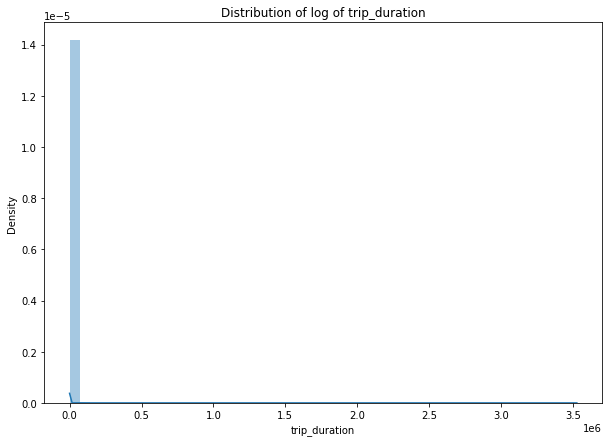

In [27]:
# Plotting the distribution of target variable 'trip_duration'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
# log transform is used for the target variable
sns.distplot(x= df.trip_duration)
sns.set_theme(style='darkgrid')
ax.set_xlabel('trip_duration')
ax.set_title('Distribution of trip_duration')

**Observations**:

From the above plot we can know that the dribution of the target variable 'trop_duration' is rightly skwed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of trip_duration')

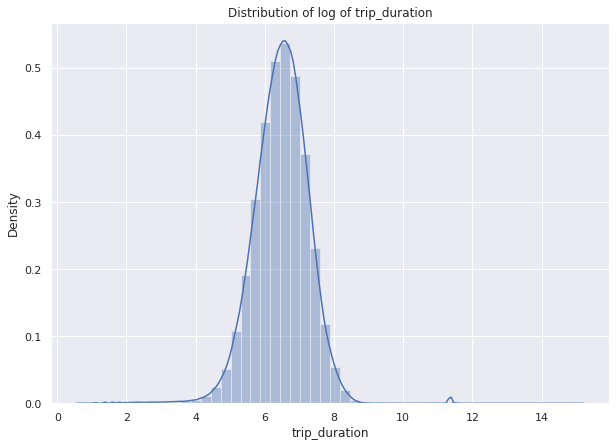

In [28]:
# Plotting the distribution of target variable 'trip_duration'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
# log transform is used for the target variable
sns.distplot(x= np.log(df.trip_duration.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('trip_duration')
ax.set_title('Distribution of log of trip_duration')

Text(0.5, 1.0, 'Analysis of trip_duration')

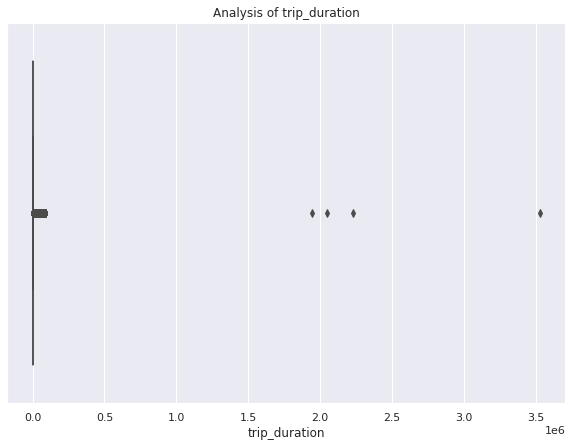

In [29]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.trip_duration)
sns.set_theme(style='darkgrid')
ax.set_xlabel('trip_duration')
ax.set_title('Analysis of trip_duration')

**Observations**:

From the above plot we can say that the log of the target variable 'trip_duration' following the normal distribution.

* Since the distribution is rightly swed we applied log tranform.
* The skewness is occured because of the large outliars as shown on the boxplot figure.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of calculated_trip_duration')

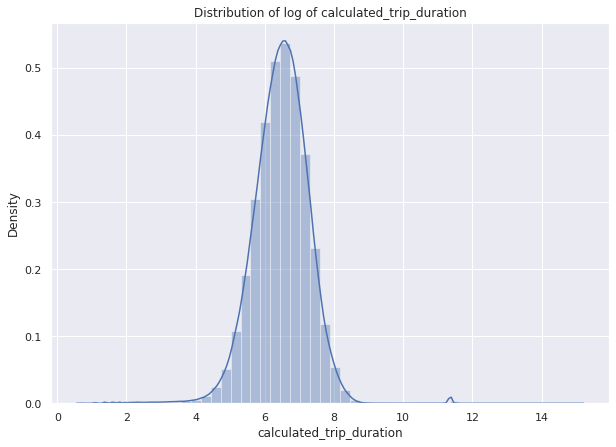

In [30]:
# Plotting the distribution of 'calculated_trip_duration'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= np.log(df.calculated_trip_duration.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('calculated_trip_duration')
ax.set_title('Distribution of log of calculated_trip_duration')

**Observations**:

From the above plot we can say that the distribution of the variable 'calculated_trip_duration' following the normal distribution.

* Since the distribution is rightly swed we applied log tranform.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of distance')

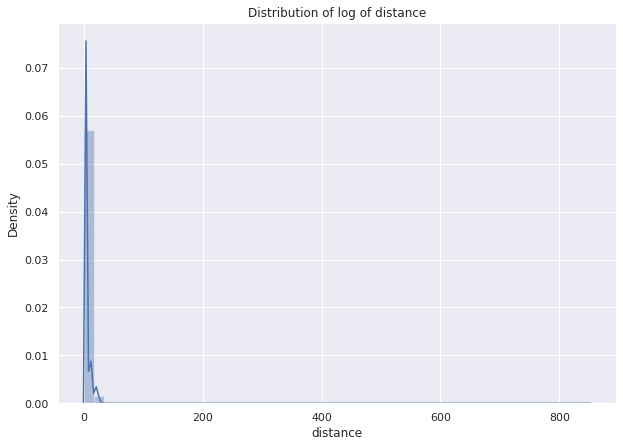

In [31]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= df.distance)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
ax.set_title('Distribution of log of distance')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of distance')

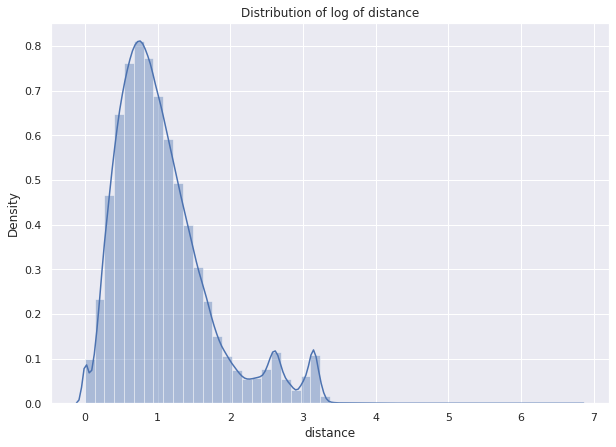

In [32]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= np.log(df.distance.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
ax.set_title('Distribution of log of distance')

Text(0.5, 0, 'distance')

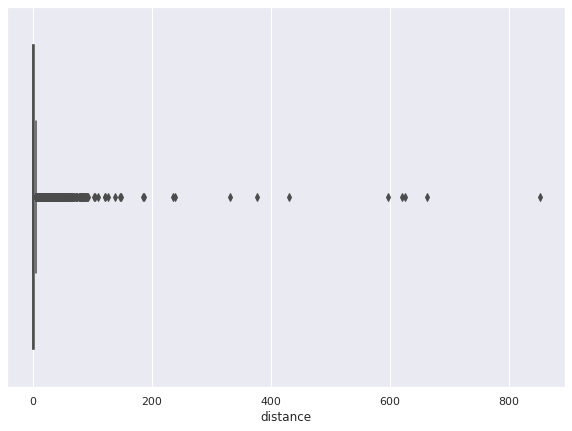

In [33]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.distance)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
ax.set_title('Analysis of distance')

**Observations**:

From the above plot we can say that the distribution of the variable 'distance' is not fully following the normal distribution.

* Since the distribution is rightly swed we applied log tranform.
* Even appling the log transform still it is slightly right skwed.
* the above plots can show the huge impact of outliars in the 'distance' distribution.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of speed')

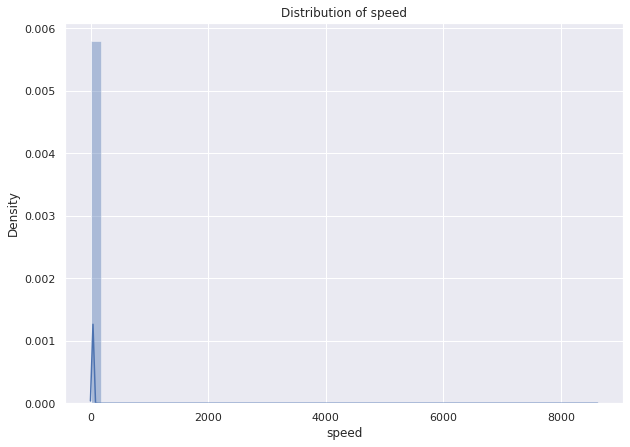

In [34]:
# Plotting the distribution of 'calculated_trip_duration'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= df.speed.values+1)
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
ax.set_title('Distribution of speed')

Text(0.5, 1.0, 'Analysis of speed')

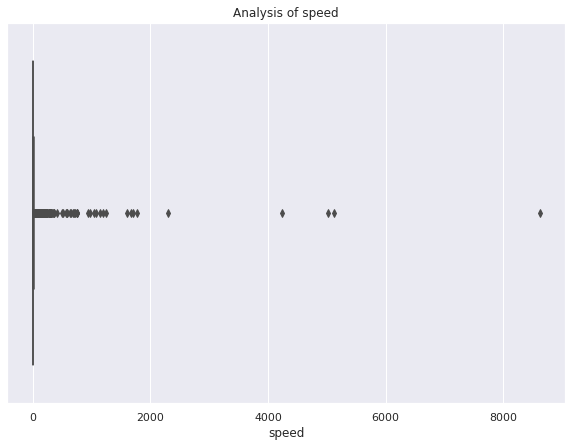

In [35]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.speed)
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
ax.set_title('Analysis of speed')

In [36]:
df.speed.describe()

count    1.458644e+06
mean     1.139417e+01
std      1.363692e+01
min      0.000000e+00
25%      5.741709e+00
50%      9.586934e+00
75%      1.456636e+01
max      8.619142e+03
Name: speed, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of log of speed')

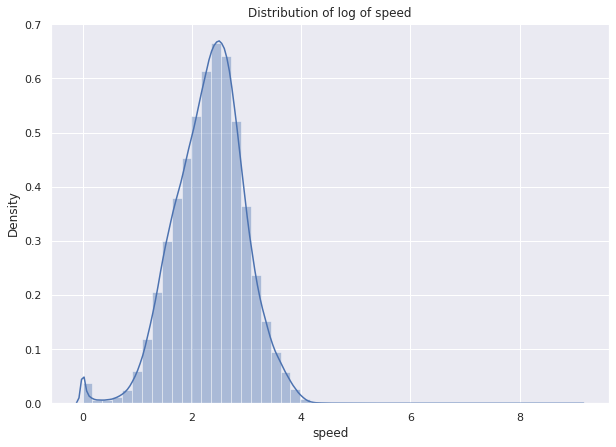

In [37]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.distplot(x= np.log(df.speed.values+1))
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
ax.set_title('Distribution of log of speed')

Text(0.5, 0, 'speed')

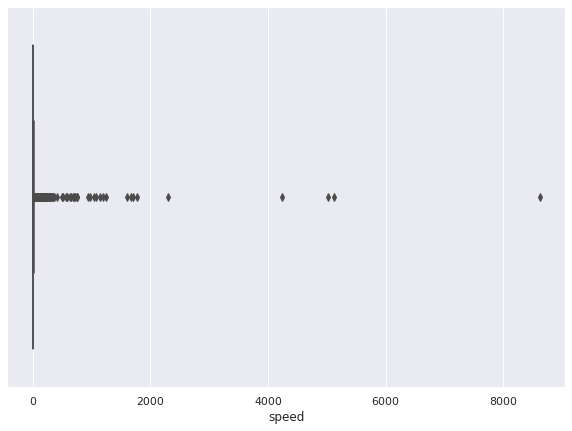

In [38]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= df.speed)
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
ax.set_title('Analysis of speed')

In [39]:
lim_speed_df = df[df.speed < 400]

In [40]:
lim_speed_df.speed.groupby(pd.cut(lim_speed_df.speed, np.arange(0,400,10))).count()

speed
(0, 10]       760088
(10, 20]      523599
(20, 30]      117270
(30, 40]       35426
(40, 50]       12210
(50, 60]        3222
(60, 70]         541
(70, 80]         138
(80, 90]          64
(90, 100]         33
(100, 110]        30
(110, 120]        16
(120, 130]         5
(130, 140]        10
(140, 150]        10
(150, 160]        12
(160, 170]         5
(170, 180]         5
(180, 190]         1
(190, 200]         6
(200, 210]         1
(210, 220]         4
(220, 230]         1
(230, 240]         3
(240, 250]         3
(250, 260]         0
(260, 270]         1
(270, 280]         2
(280, 290]         1
(290, 300]         3
(300, 310]         1
(310, 320]         1
(320, 330]         1
(330, 340]         1
(340, 350]         1
(350, 360]         1
(360, 370]         1
(370, 380]         0
(380, 390]         0
Name: speed, dtype: int64

Text(0.5, 0, 'speed')

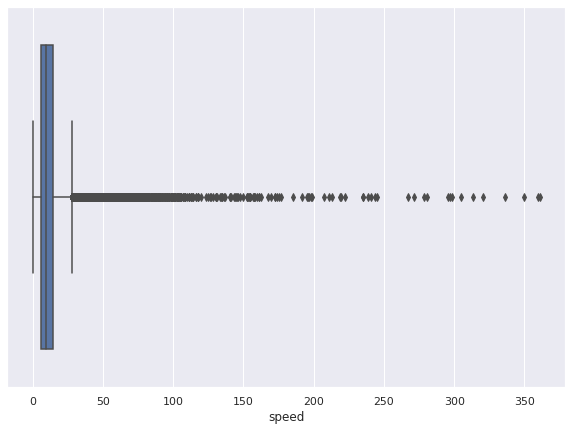

In [41]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x= lim_speed_df.speed)
sns.set_theme(style='darkgrid')
ax.set_xlabel('speed')
# ax.set_ylabel('Frequency')
ax.set_title('Analysis of limited speed')

Text(0.5, 0, 'Count')

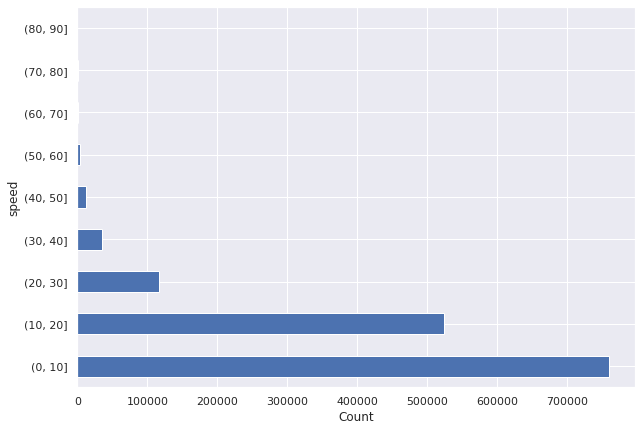

In [42]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
lim_speed_df.speed.groupby(pd.cut(lim_speed_df.speed, np.arange(0,100,10))).count().plot(kind='barh')
sns.set_theme(style='darkgrid')
ax.set_xlabel('Count')

**Observations**:

From the above plot we can say that the distribution of the variable 'speed' following the normal distribution.

* Since the distribution is rightly swed we applied log tranform.
* It occurs because of the huge outliars of the 'speed' data points.
* Most of the 'speed' value occurs in between 0 to 20 km/h.
* We can conclude that mostly the taxi drivers following the speed limitations.

Text(0.5, 0, 'store_and_fwd_flag')

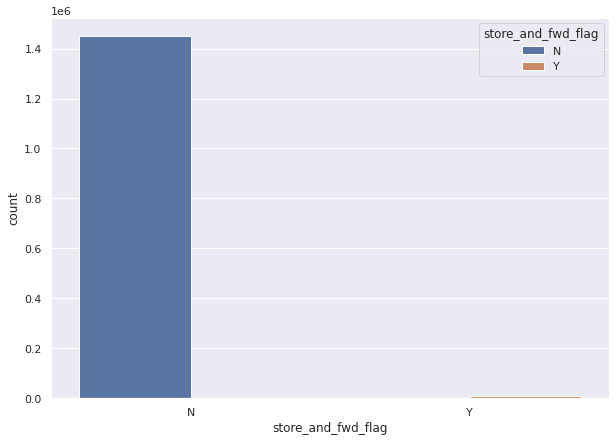

In [43]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='store_and_fwd_flag', data=df, hue='store_and_fwd_flag')
sns.set_theme(style='darkgrid')
ax.set_xlabel('store_and_fwd_flag')
# ax.set_ylabel('Frequency')
ax.set_title('store_and_fwd_flag Count')

In [44]:
df.store_and_fwd_flag.value_counts(normalize=True)

N    0.994485
Y    0.005515
Name: store_and_fwd_flag, dtype: float64

**Observations**:
* Flag has huge difference between flag 'Yes' and 'No'.
* 'Yes' has very less in counts.*italicised text*

Text(0.5, 0, 'pickup_hour')

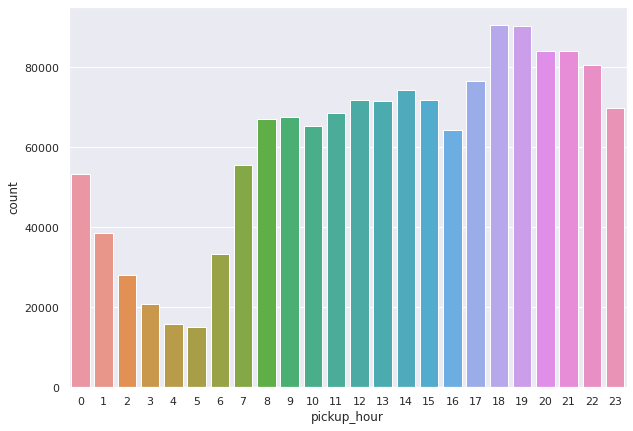

In [45]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='pickup_hour', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('pickup_hour')
# ax.set_ylabel('Frequency')
ax.set_title('pickup_hour Count')

**Observations**:
* From the above plot we can say that most of taxi rides are happening between evening 5 pm to 10 pm
* Least counts happening in the early morning between 2 am to 5 am

### Multivariate analysis

Text(0.5, 1.0, 'pickup_hour vs trip_duration for store and fwd flag')

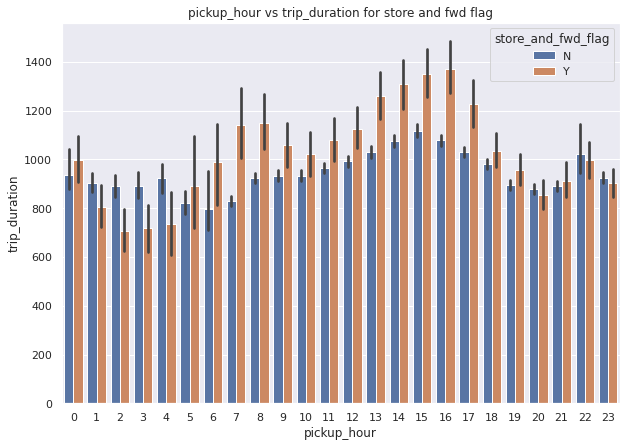

In [46]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="pickup_hour", y="trip_duration", data=df, hue="store_and_fwd_flag")
sns.set_theme(style='darkgrid')
ax.set_title('pickup_hour vs trip_duration for store and fwd flag')

**Observations**:
* 
* 

Text(0.5, 0, 'pickup_weekday')

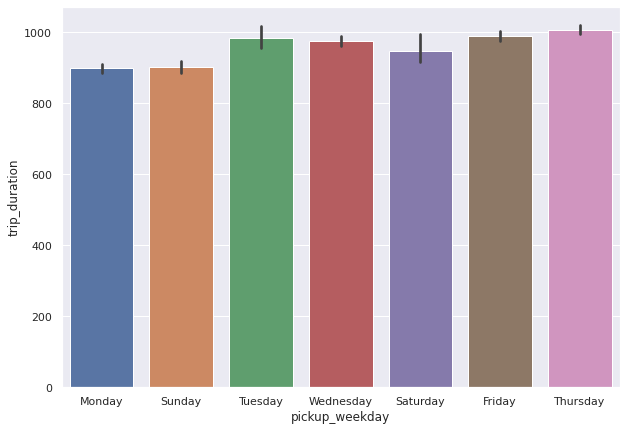

In [47]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='pickup_weekday_name', y='trip_duration', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('pickup_weekday')
ax.set_title('pickup_hour vs pickup_weekday')

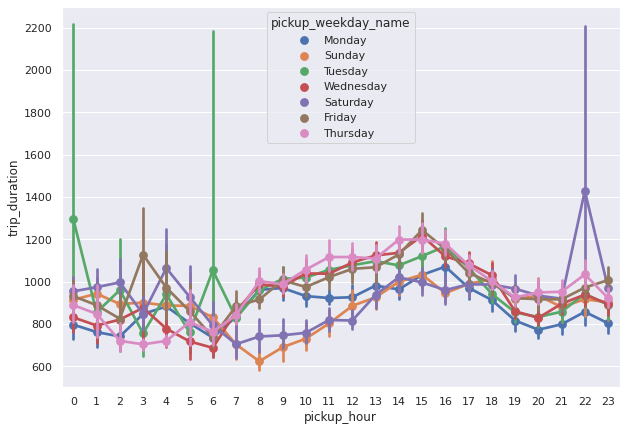

In [48]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.pointplot(x="pickup_hour", y="trip_duration", data=df, hue="pickup_weekday_name")
sns.set_theme(style='darkgrid')
ax.set_title('pickup_hour vs day wise trip_duration')

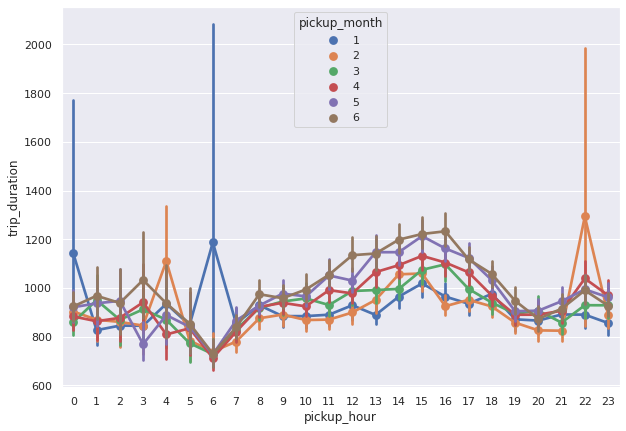

In [49]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.pointplot(x="pickup_hour", y="trip_duration", data=df, hue="pickup_month")
sns.set_theme(style='darkgrid')
ax.set_title('pickup_hour vs montly trip_duration')

Text(0.5, 1.0, 'Vendor_id vs trip_duration')

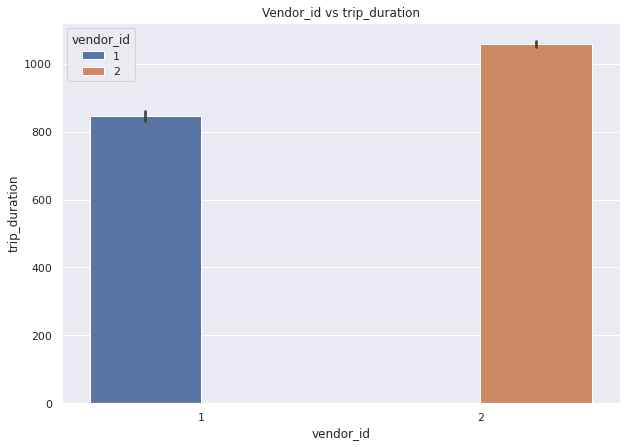

In [50]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='vendor_id', y='trip_duration', data=df, hue='vendor_id')
sns.set_theme(style='darkgrid')
ax.set_xlabel('vendor_id')
ax.set_title('Vendor_id vs trip_duration')

**Observations:**
* Most trips finished within 6-10 minute (400-600 sec)

* Duration are longer when store_and_fwd_flag = Y, maybe because internet is bad in areas off downtowm, imply taxi drivers much longer relatively.

* Duration RISE dramtically from 7 am to 10 am, maybe owing to traffic jam and people start moving to NYC from nearyby areas when daytime

* Months only affect duration a little bit, while pickup hours seems may be infulence that more

* Weekday is apparently relative to duration. Duration are high duing wokday (Mon.-Fri.), since people work, taxi are much more busy to take people.

Text(0.5, 0, 'passenger_count')

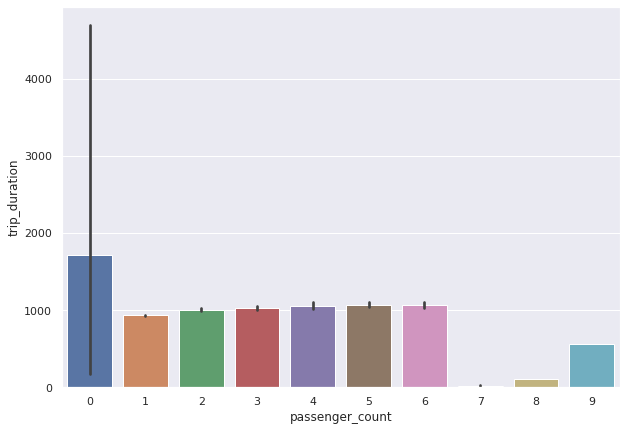

In [51]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x='passenger_count', y='trip_duration', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('passenger_count')
ax.set_title('passenger_count vs trip_duration')

Text(0.5, 0, 'passenger_count')

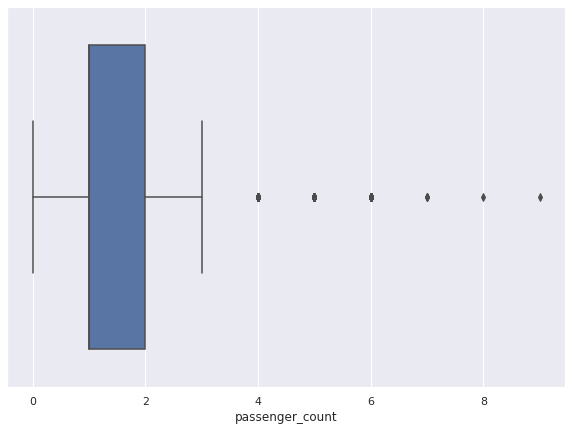

In [52]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.boxplot(x='passenger_count', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('passenger_count')
# ax.set_ylabel('Frequency')
ax.set_title('passenger_count for each category')

**Observations:**

* Averagely 12000 - 16000 passengers per day
* Most taxi take one passengers per ride, but some numbers like 0,7,8,9 maybe are outliers

Text(0.5, 0, 'distance')

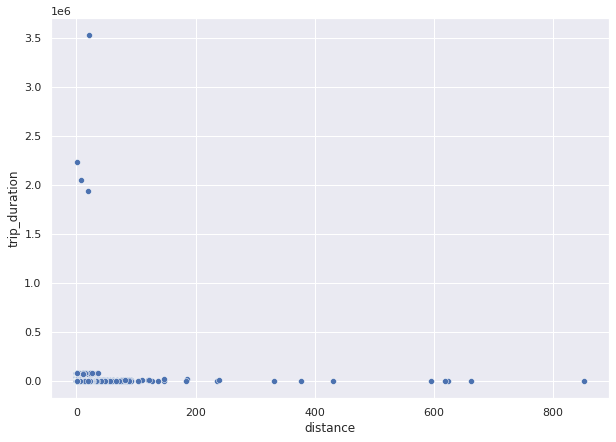

In [53]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x='distance', y='trip_duration', data=df)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
ax.set_title('distance vs trip_duration')

Text(0.5, 0, 'distance')

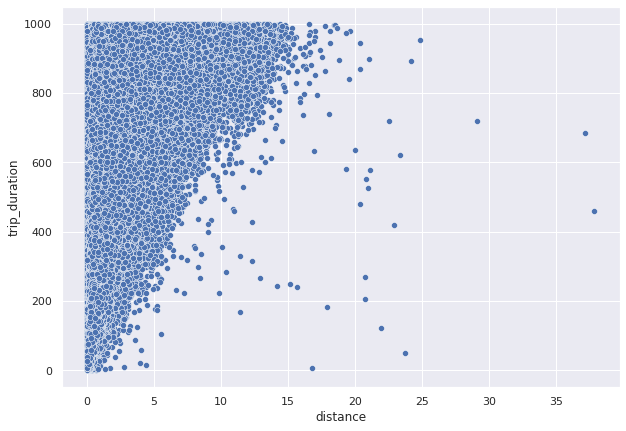

In [54]:
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x='distance', y='trip_duration', data=dur_dist)
sns.set_theme(style='darkgrid')
ax.set_xlabel('distance')
ax.set_title('limited distance vs trip_duration')

<Figure size 720x504 with 0 Axes>

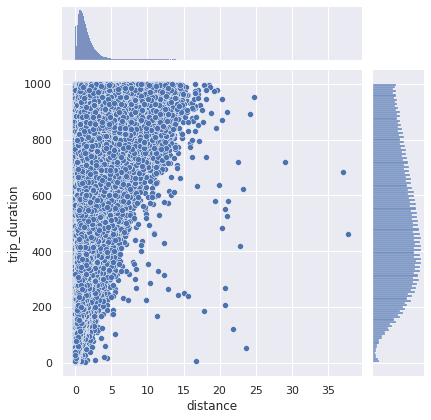

In [55]:
fig = plt.figure(figsize=(10,7))
# ax = fig.gca()
sns.jointplot(x='distance', y='trip_duration', data=dur_dist)
sns.set_theme(style='darkgrid')
# ax.set_xlabel('distance')
ax.set_title('Joint plot of trip_uration VS distance')

Text(0.5, 1.0, 'log(trip_duration) VS log(distance)')

<Figure size 720x504 with 0 Axes>

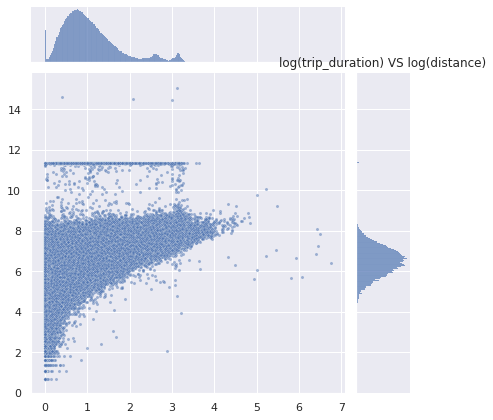

In [56]:
fig = plt.figure(figsize=(10,7))
# ax = fig.gca()
sns.jointplot(x= np.log(df.distance.values+1), y=np.log(df.trip_duration.values+1), s=10, alpha=0.5)
sns.set_theme(style='darkgrid')
plt.xlabel('distance')
plt.title('log(trip_duration) VS log(distance)')

**Observations:**

* There are positive relations within distance and duration in the cases.
* It fits common sense that trip takes longer when distance longer.

### Handling Categorical values



In [57]:
# listing out the categorical values
cat_variables = ['vendor_id','passenger_count', 'pickup_month', 'pickup_weekday','pickup_hour']

In [58]:
tmp_df = df[cat_variables]

In [59]:
# Encoding the categorical values using dummies
for var in cat_variables:
  tmp = pd.get_dummies(df[var], prefix=var)
  tmp.drop(tmp.columns[0], axis=1, inplace=True) #avoid dummy trap
  df = pd.concat([df,tmp], axis = 1)

In [60]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,0,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,0,0,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'calculated_trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'distance', 'speed', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'vendor_id_2', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'passenger_count_8', 'passenger_count_9', 'pickup_month_2',
       'pickup_month_3', 'pickup_month_4', 'pickup_month_5', 'pickup_month_6',
       'pickup_weekday_1', 'pickup_weekday_2', 'pickup_weekday_3',
       'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6',
       'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4',
       'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8',
       'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12',
      

### Variance Inflation Factor (VIF)

In [62]:
# indv = ['vendor_id', 'passenger_count','pickup_month', 'store_and_fwd_flag_Y', 'pickup_weekday', 'pickup_hour', 'distance', 'speed']
indv = ['vendor_id_2','pickup_longitude', 'pickup_latitude','calculated_trip_duration', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count_1', 'passenger_count_2', 'passenger_count_3', 'passenger_count_4', 'passenger_count_5', 'passenger_count_6', 'passenger_count_7', 'passenger_count_8', 'passenger_count_9', 'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5', 'pickup_month_6', 'pickup_weekday_1', 'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22', 'pickup_hour_23', 'store_and_fwd_flag_N', 'distance', 'speed']
dv = ['trip_duration']
print(indv)
print(dv)

['vendor_id_2', 'pickup_longitude', 'pickup_latitude', 'calculated_trip_duration', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count_1', 'passenger_count_2', 'passenger_count_3', 'passenger_count_4', 'passenger_count_5', 'passenger_count_6', 'passenger_count_7', 'passenger_count_8', 'passenger_count_9', 'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5', 'pickup_month_6', 'pickup_weekday_1', 'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6', 'pickup_hour_1', 'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14', 'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18', 'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22', 'pickup_hour_23', 'store_and_fwd_flag_N', 'distance', 'speed']
['trip_duration']


In [63]:
def calc_vif(X):
    '''This function can take a dataframe as input and can calculate the Variance Inflation Factor( VIF) and wil return them'''
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [64]:

tmp_var_updated = ['store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_longitude' , 'dropoff_longitude', 'distance',]

In [65]:
# Calculation of VIF for each independent variables
calc_vif(df[[i for i in df.describe().columns if i in tmp_var_updated]])

,variables,VIF
0,pickup_longitude,2.829298e+00
1,dropoff_longitude,2.644025e+00
2,distance,1.116007e+00
3,store_and_fwd_flag_N,1.290085e+06
4,store_and_fwd_flag_Y,7.155225e+03


### Correlation analysis

In [66]:
# Calculation of correlation
df_corr = df[indv+dv].corr()

Text(0.5, 1.0, 'NYC Taxi Trip dataset correlation table')

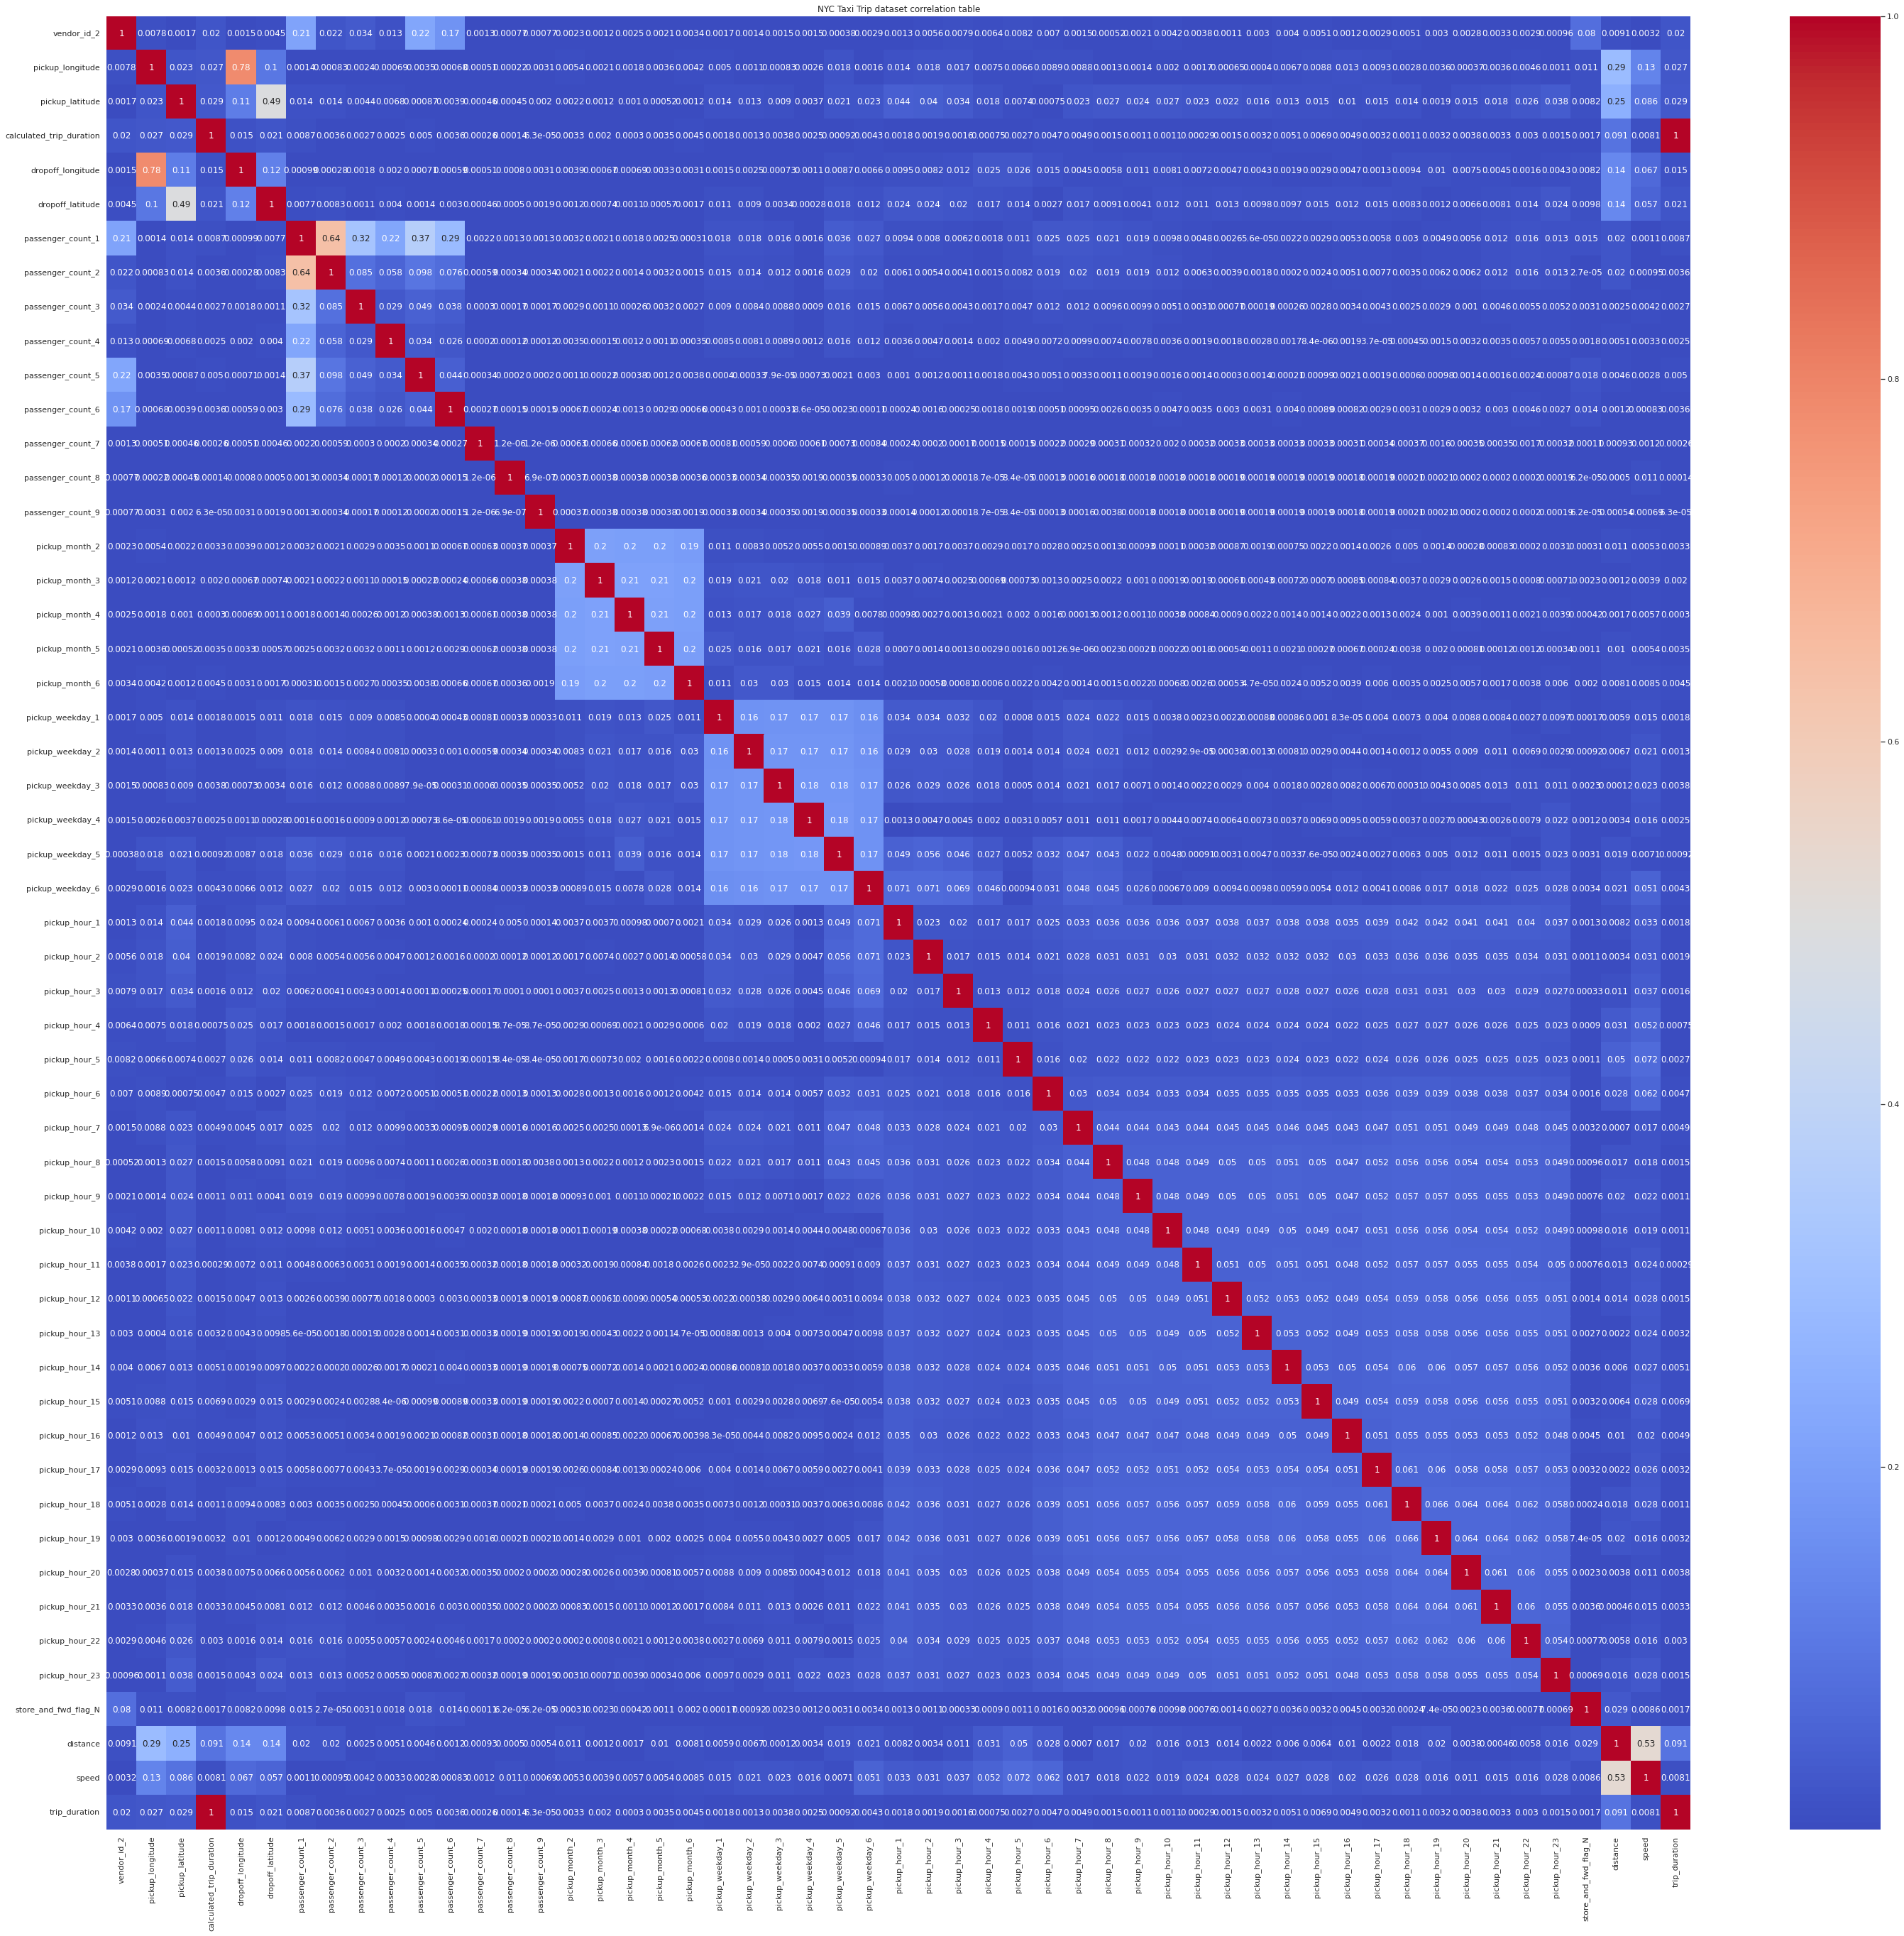

In [68]:
# Plotting the correlation
fig = plt.figure(figsize=(50,47))
ax = fig.gca()
sns.heatmap(abs(df_corr), annot=True, cmap='coolwarm')
plt.title('NYC Taxi Trip dataset correlation table')

**Observations:**
* All of the features shows NO correlation at all. Because feature extraction removes all collinearity.

Let's move on to the Model now.

### Splitting the data for training

In [69]:
X = df[indv]
y = df[dv]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [72]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size =  0.3, random_state = 3)

### Linear regression implementation

In [73]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [74]:
lin_reg = LinearRegression()

In [75]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
lin_reg.score(X_train, y_train)

1.0

In [77]:
lin_reg.coef_

array([[-5.94668762e-13, -1.14495080e-11, -1.51276112e-11,
         1.00000000e+00, -1.14893327e-11,  2.83590539e-12,
         2.28964725e-11,  2.38535889e-11,  2.10277545e-11,
         2.37264429e-11,  2.48717971e-11,  2.41326817e-11,
         2.87404559e-11,  0.00000000e+00, -1.27298084e-10,
        -1.46737374e-12, -3.21345764e-12, -3.09276139e-12,
        -5.01603692e-13, -2.36057700e-12,  8.08163833e-13,
         1.13738397e-12,  1.64471706e-12, -1.86220904e-14,
         1.54679847e-12,  2.26461382e-12, -2.26810936e-12,
        -6.86036820e-13, -4.04382828e-12, -2.59431613e-13,
         5.37428992e-13,  3.85358362e-13, -1.29352057e-12,
        -1.05488843e-12, -1.09901745e-12, -8.58878601e-13,
        -8.70841743e-13, -6.82560774e-13, -8.15744297e-13,
        -1.19503163e-12, -1.03857192e-12, -9.01779877e-13,
        -3.76906199e-13, -2.32699600e-12,  3.25679200e-13,
        -5.45706388e-13, -6.51799203e-13, -9.64748177e-13,
        -7.80907609e-13, -7.58215664e-14,  7.07424652e-1

In [78]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[ 439.],
       [ 523.],
       [ 483.],
       ...,
       [1830.],
       [2941.],
       [ 700.]])

In [ ]:
y_test

In [79]:
def adjusted_r2(x, r2):
  n = len(x)
  p = len(x.columns)
  adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
  return adj_r2

In [80]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_score_lin = r2_score(y_test, y_pred)
print("R2 :" ,r2_score_lin)
print("Adjusted R2 Linear Regression: " ,adjusted_r2(X_test, r2_score_lin))

MSE : 8.397707067237913e-24
RMSE : 2.897879753757549e-12
R2 : 1.0
Adjusted R2 Linear Regression:  1.0


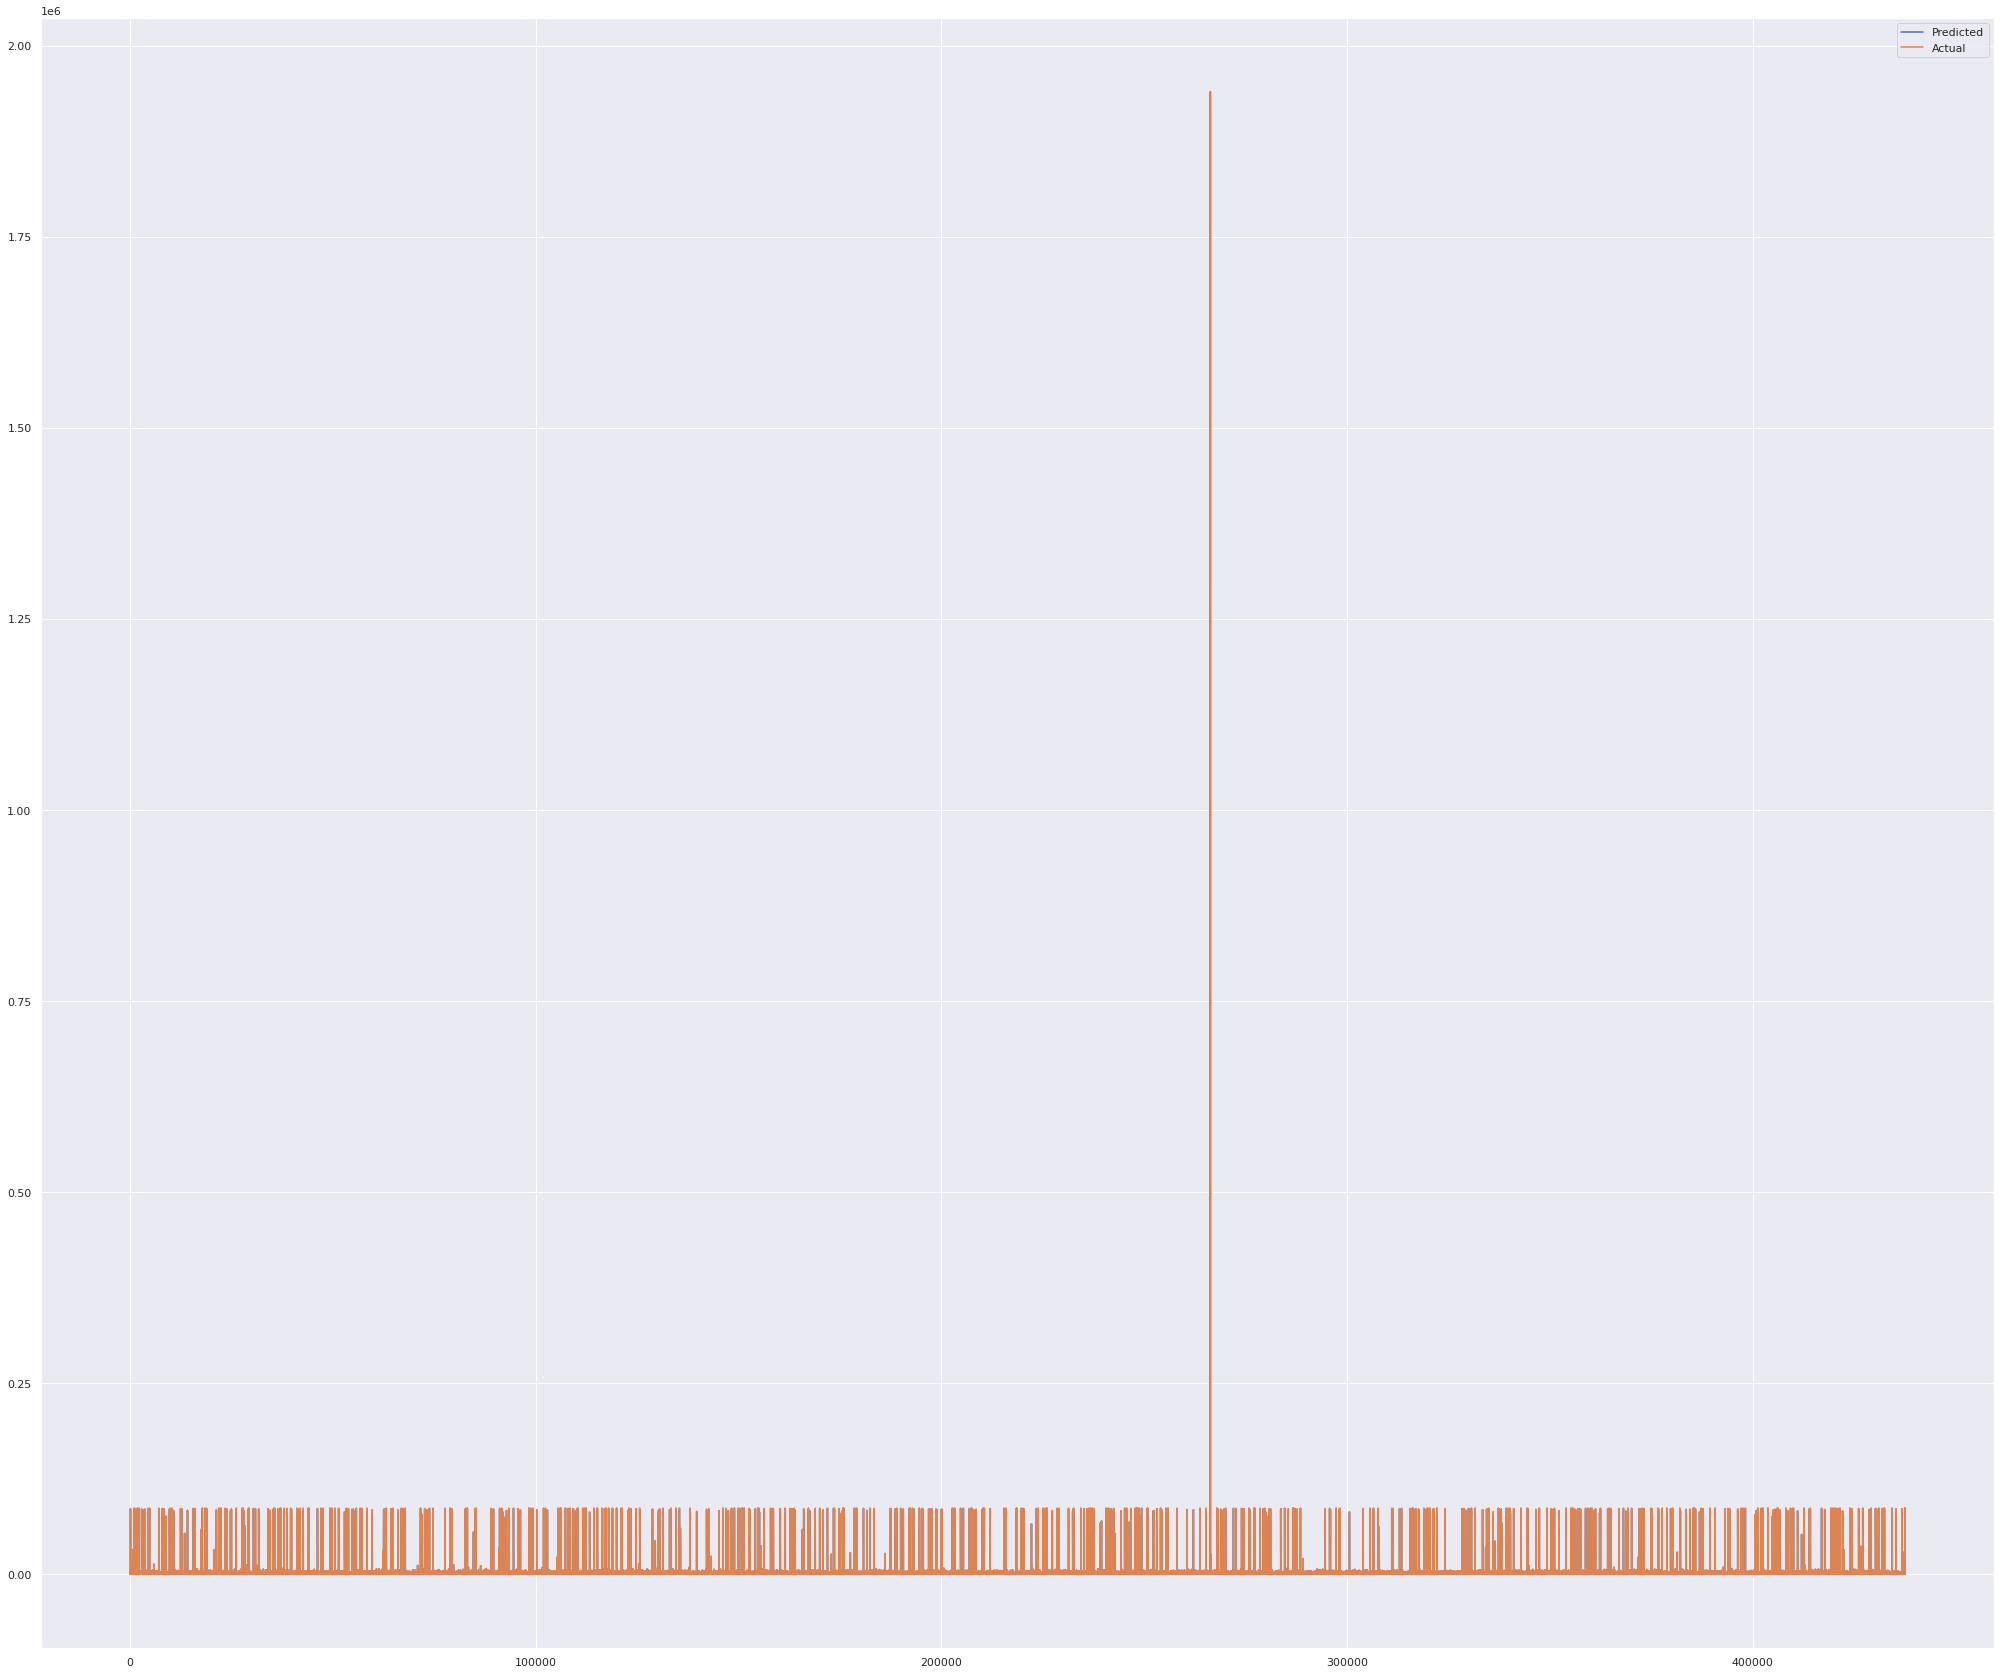

In [81]:
plt.figure(figsize=(35,30))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Lasso regression

In [82]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [83]:
lasso.score(X_train, y_train)

1.0

In [84]:
lasso.coef_

array([ 0.,  0., -0.,  1.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.])

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [87]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -3.6407592767581576e-13


In [88]:
y_pred_lasso = lasso_regressor.predict(X_test)

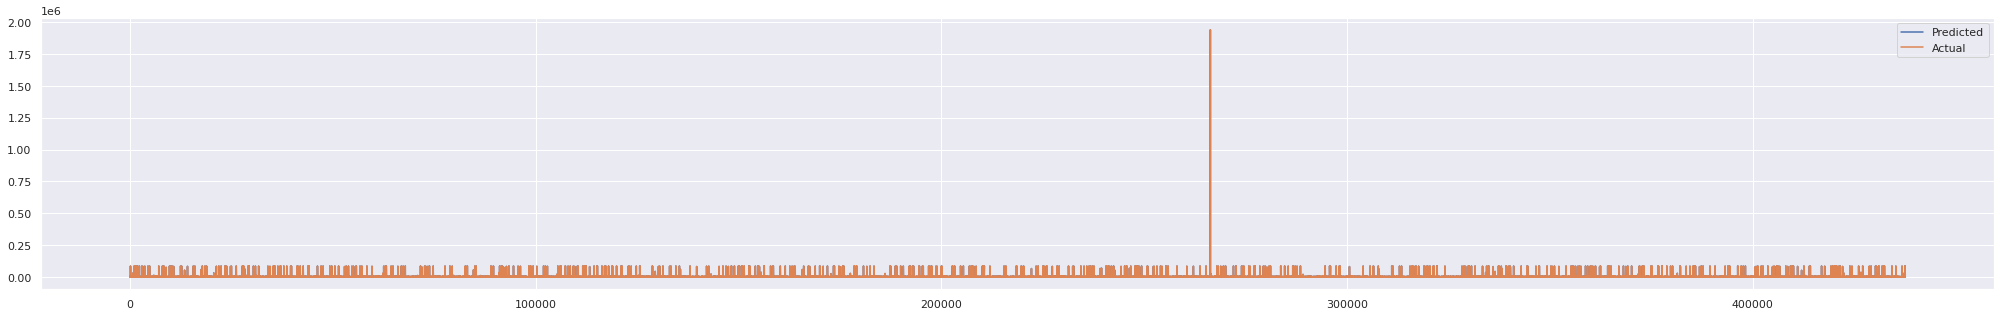

In [89]:
plt.figure(figsize=(35,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [90]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2_lasso)
print("Adjusted R2 Lasso Regression: " ,adjusted_r2(X_test, r2_lasso))

MSE : 2.209253866771402e-14
RMSE : 1.4863559017851013e-07
R2 : 1.0
Adjusted R2 Lasso Regression:  1.0


Ridge regression

In [91]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.52676e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.25506e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.51638e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.52676e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [92]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -7.690732094539753e-23


In [93]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [94]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2_ridge)
print("Adjusted R2 Ridge Regression: " ,adjusted_r2(X_test, r2_ridge))

MSE : 1.7409028366053771e-22
RMSE : 1.3194327707789349e-11
R2 : 1.0
Adjusted R2 Ridge Regression:  1.0


Elasticnet Regression

In [95]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [96]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [97]:
elasticnet.score(X_train, y_train)

1.0

In [98]:
y_pred_en = elasticnet.predict(X_test)

In [99]:
MSE  = mean_squared_error(y_test, y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic = r2_score(y_test, y_pred_en)
print("R2 :" ,r2_elastic)
print("Adjusted R2 for Elasticnet: " ,adjusted_r2(X_test, r2_elastic))

MSE : 1.9360243910702122e-10
RMSE : 1.3914109353710758e-05
R2 : 1.0
Adjusted R2 for Elasticnet:  1.0


In [100]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_reg = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2_elastic_reg)
print("Adjusted R2 for Elasticnet Regression: " ,adjusted_r2(X_test, r2_elastic_reg))

In [ ]:
plt.figure(figsize=(35,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

### Decision Tree implementation

Model training and prediction

In [101]:
trip_duration_reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10, random_state=0)
trip_duration_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10, random_state=0)

In [102]:
y_train_pred = trip_duration_reg.predict(X_train)

In [103]:
y_train_pred[:10]

array([ 386.17627917,  908.60381094,  386.17627917,  386.17627917,
        908.60381094,  386.17627917,  386.17627917,  386.17627917,
        386.17627917, 1693.16879629])

In [104]:
y_test[:10]

,trip_duration
296687,439
164979,523
489114,483
21718,326
686024,1377
317429,1154
758474,165
1201638,505
953021,508
1373776,832


In [105]:
y_test_pred = trip_duration_reg.predict(X_test)

In [106]:
y_test_pred[:10]

array([ 386.17627917,  386.17627917,  386.17627917,  386.17627917,
       1693.16879629,  908.60381094,  386.17627917,  386.17627917,
        386.17627917,  908.60381094])

Model evaluation

In [107]:
r2_score_train = r2_score(y_train, y_train_pred)
print(r2_score_train)

0.9978816637530238


In [108]:
r2_score_test = r2_score(y_test, y_test_pred)
print(r2_score_test)

0.9864125383878035


In [109]:
adj_r2_train = adjusted_r2(X_train, r2_score_train)
print(adj_r2_train)

0.9978815558648666


In [110]:
adj_r2_test = adjusted_r2(X_test, r2_score_test)
print(adj_r2_test)

0.9864109235722689


In [111]:
mean_squared_error(y_test, y_test_pred)

255094.5802590705

In [112]:
mse_test = mean_absolute_error(y_test, y_test_pred)
print(mse_test)

172.19200686441678


In [113]:
rmse_test = np.sqrt(mse_test)
print(rmse_test)

13.122195199905265


In [114]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.4984264593408896

In [115]:
train_accuracy = cross_val_score(trip_duration_reg, X_train,y_train, cv=10 )
print(f"Train_data_accuracy: {train_accuracy}")

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

Train_data_accuracy: [0.99338093 0.99337236 0.99357511 0.9933221  0.99415318 0.99151358
 0.62032143 0.83848752 0.99329249 0.99365806]


In [116]:
test_accuracy = cross_val_score(trip_duration_reg, X_test,y_test, cv=10 )
print(f"Test_data_accuracy: {test_accuracy}")

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

Test_data_accuracy: [0.99639245 0.99472363 0.99591934 0.99599792 0.99580478 0.9959613
 0.16815042 0.99557975 0.99643395 0.99614156]
